# Dijkstra-Algorithmus
### Universität der Bundeswehr München - Prof. Dr. Claudius Steinhardt - Logistics Analytics
Erstellt von Sebastian Knall am 07.05.2022

#### Das vorliegene Notebook bezieht sich auf die Vorlesung Seite 31 im Fach Logistics Analytics - Dijkstra-Algorithmus.

#### Es soll einen einfachen Einstieg in eine mögliche Lösung des Problems bieten.


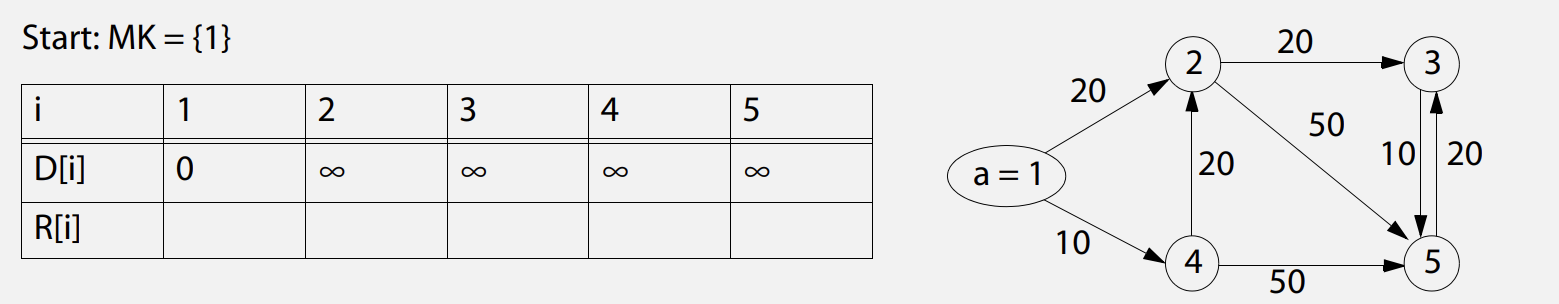

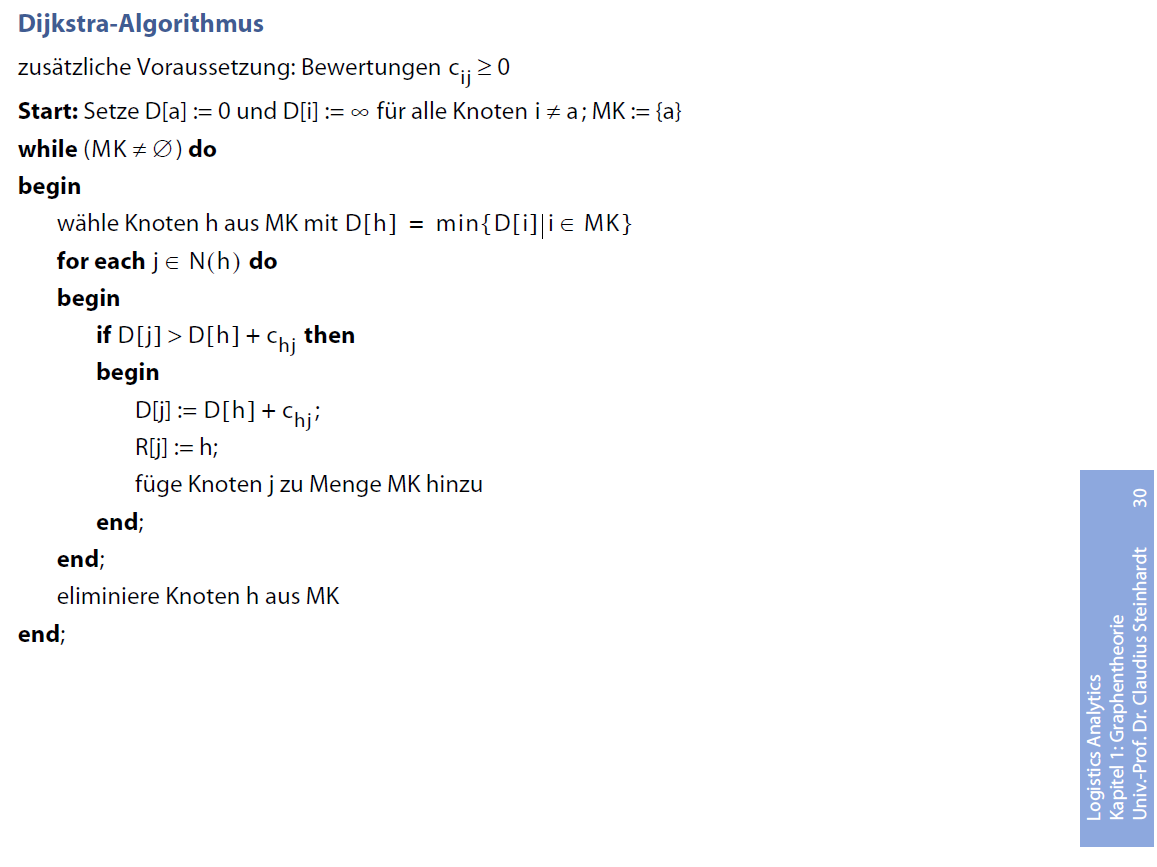

In [28]:
# Erstelle eine liste mit allen verfügbaren Knoten
knoten = ('1', '2', '3', '4', '5')

In [29]:
# Erstelle eine Menge mit allen verfügbaren Verbindungen
# und deren Entfernungen zueinander
# z.B: '1': {'2': 20, '4': 10} - Knoten '1' ist mit den Knoten '2' und '4' verbunden.
# Die jeweilige Entfernung wäre von '1' zu '2' : 20 und von '1' zu '2' : 10 usw.

entfernungen = {
    '1': {'2': 20, '4': 10},
    '2': {'3': 20, '5': 50},
    '3': {'5': 10},
    '4': {'2': 20, '5': 50},
    '5': {'3': 20},
    }


In [32]:
# Nimm als Startknoten den Knoten "1" und weise ihm die Entfernung "0" zu
# Setze D[a]:= 0 
aktuell = '1'
aktuelle_entfernung = 0

# Erstelle eine neue Menge mit allen Knoten die noch nicht vom
# Algorithmus bearbeitet wurden und weise allen Knoten in der Liste
# die Entfernung unendlich zu
# D[i]:= infinity für alle Knoten
unbesucht = {knt: float('inf') for knt in knoten}

# Weise dem aktuellen Knoten (Startknoten) in der Menge der unbesuchten Knoten
# die aktuelle Entfernung zu
unbesucht[aktuell] = aktuelle_entfernung

# Die Entfernung zum Startknoten "1" ist "0"
# Die Entfernung zu allen anderen Knoten ist unendlich "inf"
print(dict(sorted(unbesucht.items())))

# Erstelle die Menge besuchter Knoten
besucht = {}


{'1': 0, '2': inf, '3': inf, '4': inf, '5': inf}


In [33]:
'''Starte Dijkstra - Schleife '''

# Solange MK nicht leer ist (MK =/= {}) führe die Schleife aus
while unbesucht: 
    
    print("MK = {", end = " ")
    # Gleichzeit erstellt Python hier seine MK Menge, da nur potentielle Nachbarn
    # vom aktuellen Knoten betrachtet werden
    # Für jeden Nachbarknoten j € N(h)]
    for nachbar, entfernung in entfernungen[aktuell].items():
        
        # Wenn der Nachbarknoten schon bearbeitet wurde ist überspring die Schleife
        if nachbar not in unbesucht: 
            continue
            
        # Wenn der Knoten in MK ist, bestimme die Entfernung
        neue_entfernung = aktuelle_entfernung + entfernung
        
        # Gib die aktuellen Knoten in der Menge MK wieder
        print(nachbar, end = " ")
        
        # Wenn die Entfernung zum Nachbar unendlich ist, oder die Entfernung
        # zum Nachbar größer ist als die neue Entfernung ersetze den Wert
        # durch die neue Entfernung
        # Gleichzeitig 'wähle Knoten h aus MK mit D[h] = min{D[i]|i € MK}'
        # und 'if D[j] > D[h] + chj then'
        if unbesucht[nachbar] is float('inf') or unbesucht[nachbar] > neue_entfernung:
            
            # Setze die neue Entfernung ein
            # D[j] = D[h] + chj
            unbesucht[nachbar] = neue_entfernung
            
    # Setze den aktuellen Knoten in die Menge besuchter Knoten
    besucht[aktuell] = aktuelle_entfernung
    print("}")
    print(besucht)
    print("\n")
    
    # Entferne den aktuellen knoten aus der Menge unbesuchter Knoten
    del unbesucht[aktuell]
    if not unbesucht: 
        break
        
    # Sortiere die Ergebnisse
    ergebnisse = [knt for knt in unbesucht.items() if knt[1]]
    aktuell, aktuelle_entfernung = sorted(ergebnisse, key = lambda x: x[1])[0]

MK = { 2 4 }
{'1': 0}


MK = { 2 5 }
{'1': 0, '4': 10}


MK = { 3 5 }
{'1': 0, '4': 10, '2': 20}


MK = { 5 }
{'1': 0, '4': 10, '2': 20, '3': 40}


MK = { }
{'1': 0, '4': 10, '2': 20, '3': 40, '5': 50}




In [20]:
# Sortiere die Ergebinisse und gib sie aus
besucht_sortiert = dict(sorted(besucht.items()))
print(besucht_sortiert)

{'1': 0, '2': 20, '3': 40, '4': 10, '5': 50}
